# Loan Approval Case Study

### Reading the data into python


In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
import pandas as pd
import numpy as np
LoanData=pd.read_csv('C:/Users/ANAPAUL/Downloads/Loan_Approval_Data.csv', encoding='latin')
print('Shape before deleting duplicate values:', LoanData.shape)

# Removing duplicate rows if any
LoanData=LoanData.drop_duplicates()
print('Shape After deleting duplicate values:', LoanData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
LoanData.head(10)

Shape before deleting duplicate values: (614, 13)
Shape After deleting duplicate values: (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


### Defining the problem statement:
Create a Predictive model which can tell weather to approve a loan application or not?
* Target Variable: Loan_Status
* Predictors: Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome etc.

Loan_Status="N" means the loan was rejected.
Loan_Status="Y" means the loan was approved.

### Determining the type of Machine Learning
Based on the problem statement you can understand that we need to create a supervised ML classification model, as the target variable is categorical.

### Looking at the distribution of Target variable

<AxesSubplot:xlabel='Loan_Status'>

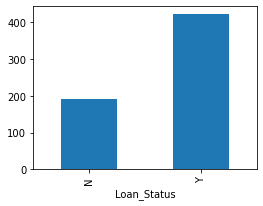

In [4]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=LoanData.groupby('Loan_Status').size()
GroupedData.plot(kind='bar', figsize=(4,3))

### Basic Data Exploration

In [5]:
# Observing the summarized information of data
LoanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [6]:
# Looking at the descriptive statistics of the data
LoanData.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [7]:
# Finding unique values for each column
LoanData.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

### Basic Data Exploration Results

* Loan_ID: Qualitative. Rejected. This column does not affect the loan approval or rejection.
* Gender: Categorical. Selected. Missing value treatment required.
* Married: Categorical. Selected. Missing value treatment required.
* Dependents: Categorical. Selected. Missing value treatment required.
* Education: Categorical. Selected.
* Self_Employed: Categorical. Selected.
* ApplicantIncome: Quantitative. Selected. Missing value treatment required.
* CoapplicantIncome: Quantitative. Selected.
* LoanAmount: Quantitative. Selected. Missing value treatment required.
* Loan_Amount_Term: Categorical. Selected. Missing value treatment required.
* Credit_History: Categorical. Selected. Missing value treatment required.
* Property_Area: Categorical. Selected.
* Loan_Status: Categorical. Selected. This is the Target Variable!

### Removing useless variables from data

In [8]:
UselessColumns = ['Loan_ID']
LoanData = LoanData.drop(UselessColumns,axis=1)
LoanData.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Visual Exploratory Data Analysis

#### Visualize distribution of  Categorical Predictor variables  using bar plots:-

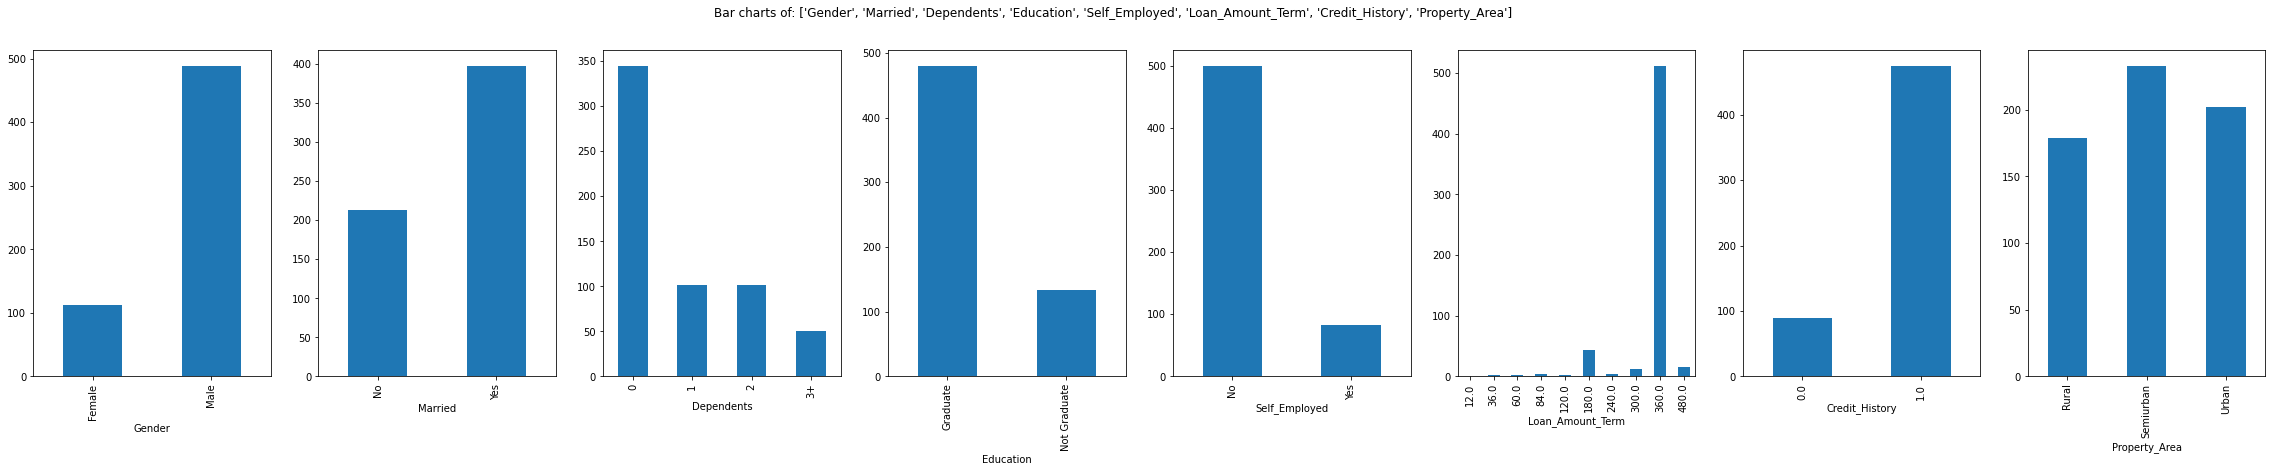

In [10]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40,6))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

#####################################################################
# Calling the function
PlotBarCharts(inpData=LoanData, colsToPlot=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area'])

#### Visualize distribution of the Continuous Predictor variables using histograms:-

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>, <AxesSubplot:>]],
      dtype=object)

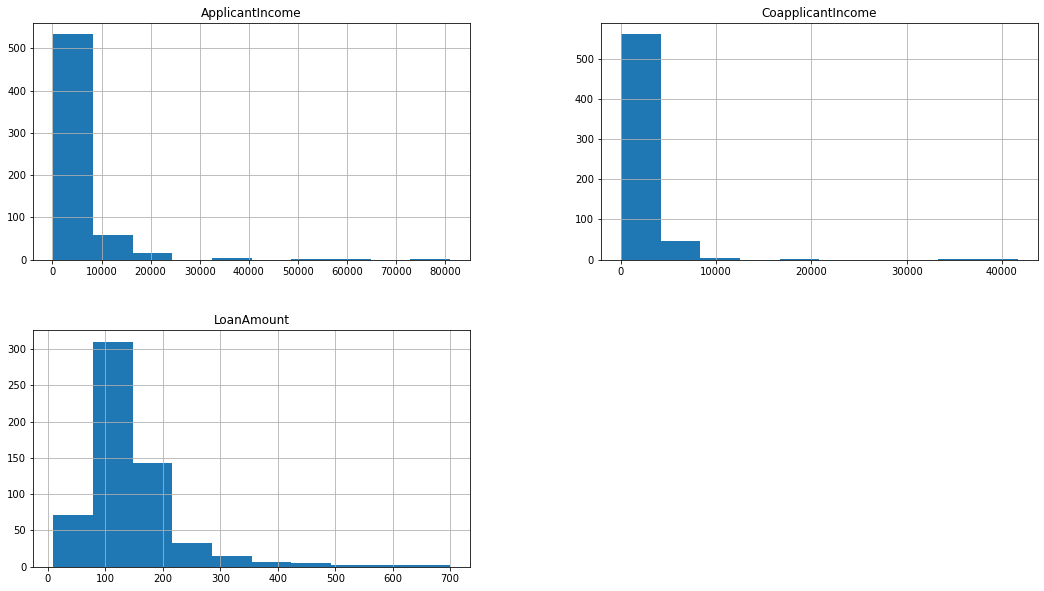

In [11]:
LoanData.hist(['ApplicantIncome', 'CoapplicantIncome','LoanAmount'], figsize=(18,10))

### Outlier Treatment

In [12]:
# Finding nearest values to 30000 mark
LoanData['ApplicantIncome'][LoanData['ApplicantIncome']>20000].sort_values()

130    20166
308    20233
284    20667
506    20833
126    23803
183    33846
443    37719
185    39147
155    39999
171    51763
333    63337
409    81000
Name: ApplicantIncome, dtype: int64

In [13]:
# Replacing outliers with nearest possibe value
LoanData['ApplicantIncome'][LoanData['ApplicantIncome']>30000] = 23803

In [14]:
# Finding nearest values to 15000 mark
LoanData['CoapplicantIncome'][LoanData['CoapplicantIncome']>10000].sort_values()

9      10968.0
177    11300.0
402    20000.0
417    20000.0
581    33837.0
600    41667.0
Name: CoapplicantIncome, dtype: float64

In [15]:
# Replacing outliers with nearest possibe value
LoanData['CoapplicantIncome'][LoanData['CoapplicantIncome']>15000] = 11300

### Visualizing distribution after outlier treatment

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>]], dtype=object)

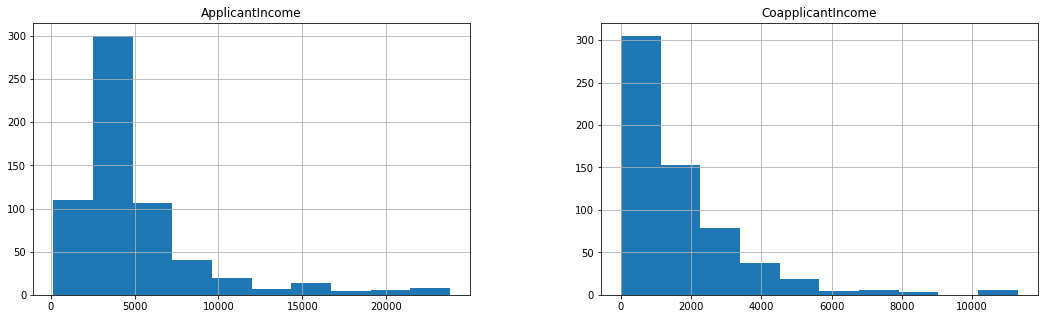

In [16]:
LoanData.hist(['ApplicantIncome', 'CoapplicantIncome'], figsize=(18,5))

### Missing values treatment

In [17]:
# Finding how many missing values are there for each column
LoanData.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
# Imputing the missing values
# Using MODE for categorical columns
LoanData['Gender'].fillna(LoanData['Gender'].mode()[0], inplace=True)
LoanData['Married'].fillna(LoanData['Married'].mode()[0], inplace=True)
LoanData['Dependents'].fillna(LoanData['Dependents'].mode()[0], inplace=True)
LoanData['Self_Employed'].fillna(LoanData['Self_Employed'].mode()[0], inplace=True)
# Using Mode value for Loan_Amount_Term since it is a categorical variable
LoanData['Loan_Amount_Term'].fillna(LoanData['Loan_Amount_Term'].mode()[0], inplace=True)
LoanData['Credit_History'].fillna(LoanData['Credit_History'].mode()[0], inplace=True)

# Using Median value for continuous columns
LoanData['LoanAmount'].fillna(LoanData['LoanAmount'].median(), inplace=True)

In [19]:
# Checking missing values again after the treatment
LoanData.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Feature Selection

#### Visual exploration of relationship between variables
#### Relationship exploration: Categorical Vs Continuous ------> Box Plots

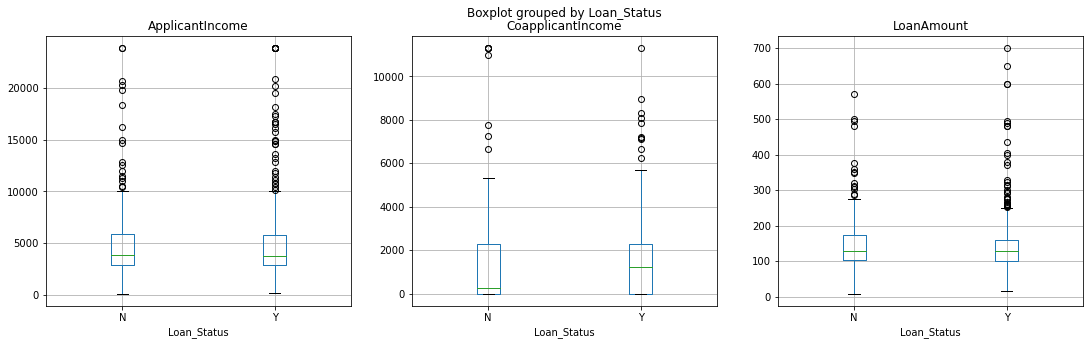

In [20]:
# Box plots for Categorical Target Variable "Loan_Status" and continuous predictors
ContinuousColsList=['ApplicantIncome','CoapplicantIncome', 'LoanAmount']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Loan_Status"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    LoanData.boxplot(column=PredictorCol, by='Loan_Status', figsize=(5,5), vert=True, ax=PlotCanvas[i])

#### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test:-


In [21]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [22]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['ApplicantIncome', 'CoapplicantIncome','LoanAmount']
FunctionAnova(inpData=LoanData, TargetVariable='Loan_Status', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

ApplicantIncome is NOT correlated with Loan_Status | P-Value: 0.9529534007092838
CoapplicantIncome is NOT correlated with Loan_Status | P-Value: 0.6651120750168427
LoanAmount is NOT correlated with Loan_Status | P-Value: 0.41132365467797827


[]

#### Relationship exploration: Categorical Vs Categorical ----->  Grouped Bar Charts

In [23]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=LoanData['Gender'], columns=LoanData['Loan_Status'])
CrossTabResult

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


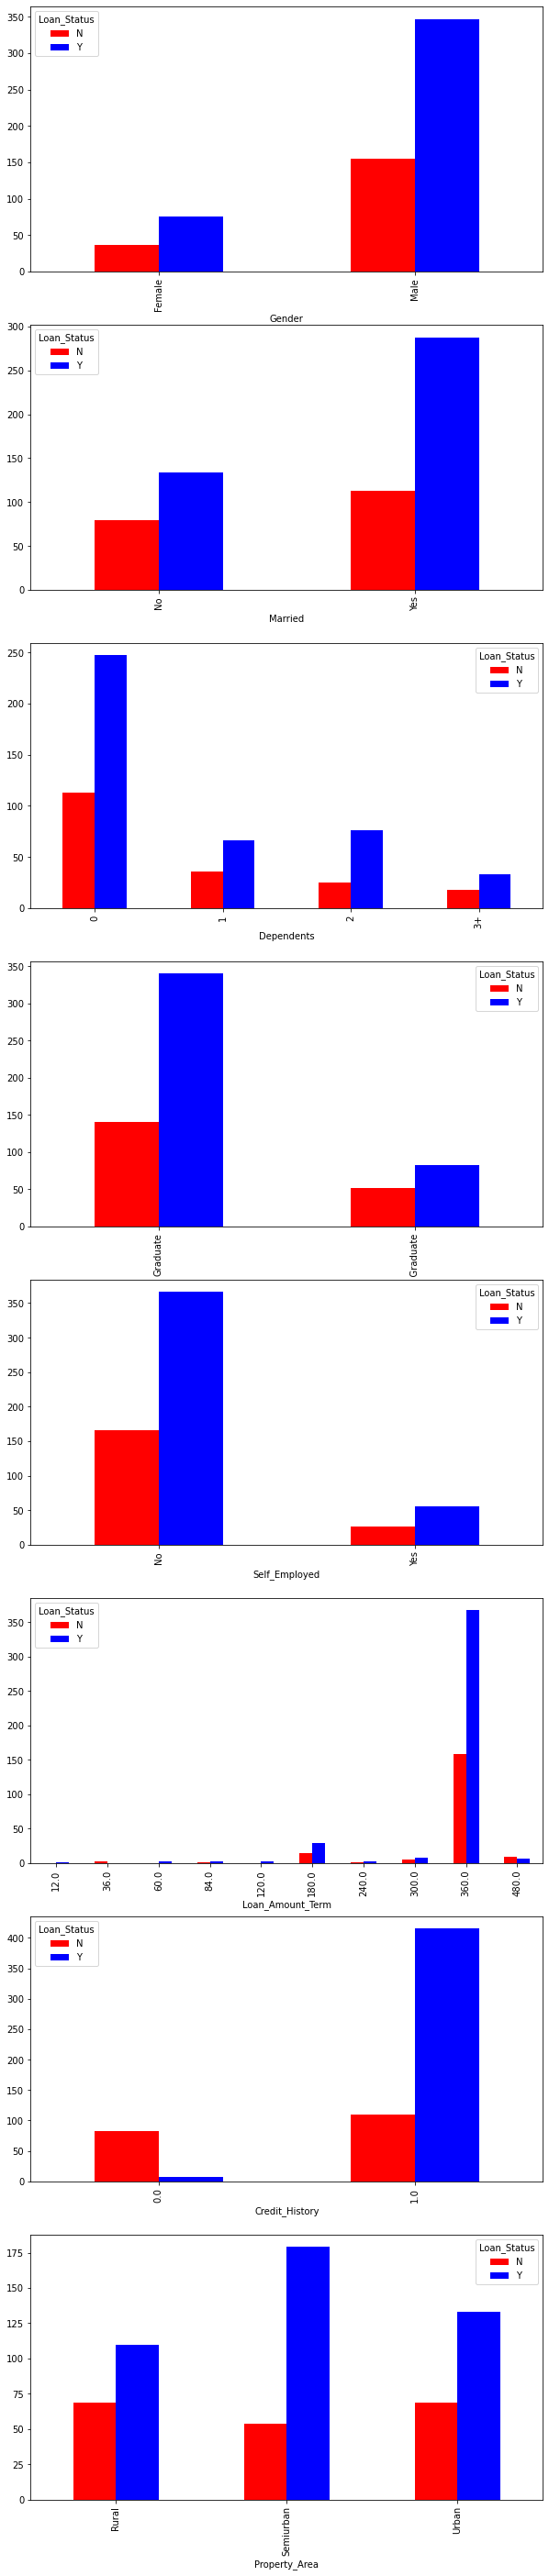

In [24]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,50))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Loan_Status"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=LoanData[CategoricalCol], columns=LoanData['Loan_Status'])
    CrossTabResult.plot.bar(color=['red','blue'], ax=PlotCanvas[i])

#### Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test :-

In [25]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [26]:
CategoricalVariables=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area']

# Calling the function
FunctionChisq(inpData=LoanData, 
              TargetVariable='Loan_Status',
              CategoricalVariablesList= CategoricalVariables)

Gender is NOT correlated with Loan_Status | P-Value: 0.7391461310869638
Married is correlated with Loan_Status | P-Value: 0.029608580862582116
Dependents is NOT correlated with Loan_Status | P-Value: 0.3688663081366005
Education is correlated with Loan_Status | P-Value: 0.04309962129357355
Self_Employed is NOT correlated with Loan_Status | P-Value: 1.0
Loan_Amount_Term is NOT correlated with Loan_Status | P-Value: 0.13058516348934335
Credit_History is correlated with Loan_Status | P-Value: 3.4183499979091188e-40
Property_Area is correlated with Loan_Status | P-Value: 0.0021360187811644915


['Married', 'Education', 'Credit_History', 'Property_Area']

### Selecting final predictors for Machine Learning


In [27]:
SelectedColumns=['Married', 'Education', 'Credit_History', 'Property_Area']

# Selecting final columns
DataForML=LoanData[SelectedColumns]
DataForML.head()

,Married,Education,Credit_History,Property_Area
0,No,Graduate,1.0,Urban
1,Yes,Graduate,1.0,Rural
2,Yes,Graduate,1.0,Urban
3,Yes,Not Graduate,1.0,Urban
4,No,Graduate,1.0,Urban


### Converting the binary nominal variable to numeric using 1/0 mapping

In [28]:
# Treating the binary nominal variables first
DataForML['Married'].replace({'Yes':1, 'No':0}, inplace=True)
DataForML['Education'].replace({'Graduate':1, 'Not Graduate':0}, inplace=True)

# Looking at data after nominal treatment
DataForML.head()

,Married,Education,Credit_History,Property_Area
0,0,1,1.0,Urban
1,1,1,1.0,Rural
2,1,1,1.0,Urban
3,1,0,1.0,Urban
4,0,1,1.0,Urban


### Converting the nominal variable to numeric using get_dummies()

In [29]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Loan_Status']=LoanData['Loan_Status']

# Printing sample rows
DataForML_Numeric.head()

,Married,Education,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0,1,1.0,0,0,1,Y
1,1,1,1.0,1,0,0,N
2,1,1,1.0,0,0,1,Y
3,1,0,1.0,0,0,1,Y
4,0,1,1.0,0,0,1,Y


### Machine Learning: Splitting the data into Training and Testing sample

In [30]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Married', 'Education', 'Credit_History', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status'],
      dtype='object')

In [31]:
# Separate Target Variable and Predictor Variables
TargetVariable='Loan_Status'
Predictors=['Married', 'Education', 'Credit_History', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

### Standardization/Normalization of data

In [32]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(429, 6)
(429,)
(185, 6)
(185,)


### Logistic Regression

In [34]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           N       0.93      0.42      0.57        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]

Final Average Accuracy of the model: 0.78


### Decision Trees

DecisionTreeClassifier(criterion='entropy', max_depth=2)
              precision    recall  f1-score   support

           N       0.93      0.42      0.57        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]

Final Average Accuracy of the model: 0.78


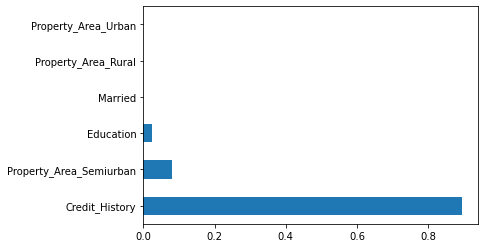

In [35]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=2,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### KNN

In [36]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

           N       0.93      0.42      0.57        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.7736365  0.7801983  0.64928253 0.6589403  0.73187264 0.60341116
 0.84147582 0.78525893 0.74986933 0.78525893]

Final Average Accuracy of the model: 0.74


### SVM

In [37]:
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=3, kernel='rbf', gamma=0.1)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

SVC(C=3, gamma=0.1)
              precision    recall  f1-score   support

           N       0.93      0.42      0.57        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]

Final Average Accuracy of the model: 0.78
